#Q2

In [1]:
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [2]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
# Normalize data
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

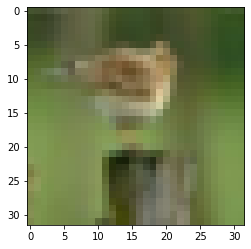

In [5]:
# Visualize data
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.show()

In [6]:
# Convert class vectors to binary class matrices.
num_classes = 10
print("Y[0] before converting : " , y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("Y[0] after converting : " , y_train[0]) 

Y[0] before converting :  [6]
Y[0] after converting :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
# Fully connected model
fc_model = keras.Sequential()
fc_model.add(keras.layers.Input(shape=x_train[0].shape))
fc_model.add(Flatten())
fc_model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
fc_model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
fc_model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))

fc_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
fc_model.add(Dense(10, activation='softmax'))

# Write your code here 
# Add Flatten layer and few Dense layers
fc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,001,546
Trainable params: 2,001,546
Non-

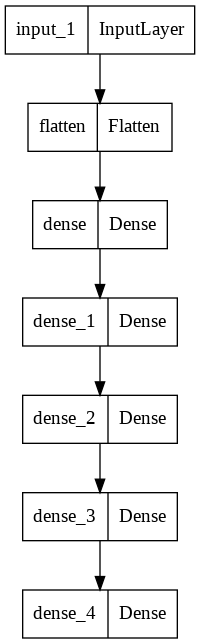

In [8]:
plot_model(fc_model)

In [9]:
Conv_model = keras.Sequential()
Conv_model.add(keras.layers.Input(shape=x_train[0].shape))
# write your code here
# add few Conv layers and Flatten layer
# you can use pool layers after Conv layers
Conv_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
Conv_model.add(MaxPooling2D((2, 2)))
Conv_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
Conv_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

Conv_model.add(Flatten())
Conv_model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
Conv_model.add(Dense(10, activation='softmax'))

Conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_5 (Dense)             (None, 32)                1048608   
                                                      

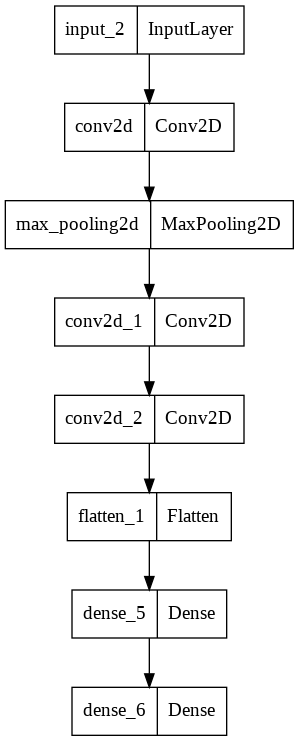

In [10]:
plot_model(Conv_model)

In [11]:
models_name = {}
models_name[0] = 'Fully Connected Model'
models_name[1] = 'Convolutional Model'

for i, model in enumerate([fc_model, Conv_model]):
    print(models_name[i])
    plot_model(model)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=2e-3),
        metrics=['accuracy'] 
    )   
    model.fit(x_train, y_train, epochs=5)
    print('\n')
    print('Loss and Accuracy on Test set : ')
    model.evaluate(x_test, y_test)
    print('\n')


Fully Connected Model
Epoch 1/5
1563/1563 [==============================] - 8s 3ms/step - loss: 1.9381 - accuracy: 0.2983
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7640 - accuracy: 0.3609
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7037 - accuracy: 0.3857
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6613 - accuracy: 0.4003
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6299 - accuracy: 0.4131


Loss and Accuracy on Test set : 
313/313 [==============================] - 1s 3ms/step - loss: 1.6687 - accuracy: 0.3992


Convolutional Model
Epoch 1/5
1563/1563 [==============================] - 13s 4ms/step - loss: 1.4512 - accuracy: 0.4778
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0573 - accuracy: 0.6250
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8852 - accuracy: 0.6878
Epoch 4/5
1563/1563 [==

#Q3

In [12]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt

In [13]:
!rm -r sample_data

In [14]:
!gdown "1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t
To: /content/fruits-360-original-size.zip
100% 579M/579M [00:03<00:00, 181MB/s]


In [15]:
!unzip fruits-360-original-size.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_96.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_98.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_0.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_10.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_100.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_102.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_104.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_106.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_108.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_110.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_112.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_114.jpg  
  infl

## A : complete resize image

In [16]:
BASE_PATH = '/content/fruits-360-original-size/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'Training')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [17]:
def resize_img(img, desired_size = 224):
    shape_img = img.shape
    scale = desired_size/shape_img[0]
    new_img = cv2.resize(img, (int(shape_img[1]*scale),int(shape_img[0]*scale)))

    back = np.zeros((desired_size,desired_size,3), np.uint8)

    yoff = round((desired_size-new_img.shape[0])/2)
    xoff = round((desired_size-new_img.shape[1])/2)

    result = back.copy()
    result[yoff:yoff+new_img.shape[0], xoff:xoff+new_img.shape[1]] = new_img
    return result

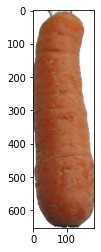

In [18]:
path = '/content/fruits-360-original-size/Training/carrot_1/r0_136.jpg'
img = cv2.imread(path)[:,:,::-1]
plt.imshow(img)
plt.show()

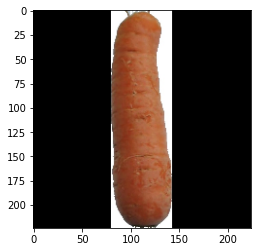

In [19]:
new_img = resize_img(img)
plt.imshow(new_img)

## Image Data generator

In [20]:
import tensorflow.keras.preprocessing.image as IM

train_datagen = IM.ImageDataGenerator(rescale=1.//255,
    preprocessing_function=resize_img)

test_datagen = IM.ImageDataGenerator(rescale=1.//255,
    preprocessing_function=resize_img)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH,batch_size=96,target_size=(224,224))
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH,batch_size=96,target_size=(224,224))

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


## B : Resnet50 with random weigts

In [21]:
# YOU CAN CHANGE IT
EPOCHS = 30

In [22]:
resnet = tf.keras.models.Sequential()

resnet.add(tf.keras.applications.ResNet50(weights=None, include_top=True,
	input_tensor=Input(shape=(224, 224, 3))))
# Write your code here

resnet.add(Flatten(name="flatten"))
resnet.add(Dense(256, activation="relu"))
resnet.add(Dropout(0.5))
resnet.add(Dense(24, activation="softmax"))
resnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense_7 (Dense)             (None, 256)               256256    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 24)                6168      
                                                                 
Total params: 25,899,136
Trainable params: 25,846,016
Non-trainable params: 53,120
_________________________________________________________________


In [23]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [24]:
resnet.fit(train_generator, epochs=1)

65/65 [==============================] - 74s 981ms/step - loss: 2.9886 - acc: 0.2049


## C : Fine-tune Resnet50 on fruits dataset.

In [25]:
fine_tune_resnet = tf.keras.models.Sequential()
# write your code here 

fine_tune_resnet.add(tf.keras.applications.ResNet50(weights="imagenet", include_top=True,
	input_tensor=Input(shape=(224, 224, 3))))

for layer in fine_tune_resnet.layers:
	layer.trainable = False

fine_tune_resnet.add(Flatten(name="flatten"))
fine_tune_resnet.add(Dense(256, activation="relu"))
fine_tune_resnet.add(Dropout(0.5))
fine_tune_resnet.add(Dense(24, activation="softmax"))


fine_tune_resnet.summary()


102967424/102967424 [==============================] - 1s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 256)               256256    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 24)                6168      
                                                                 
Total params: 25,899,136
Trainable params: 262,424
Non-trainable params: 25,636,712
___________________________________

In [26]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
fine_tune_resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [27]:
fine_tune_resnet.fit(train_generator, epochs=1)

65/65 [==============================] - 36s 510ms/step - loss: 3.0392 - acc: 0.2391


## Test models

In [28]:
resnet.evaluate(test_generator)

33/33 [==============================] - 18s 512ms/step - loss: 3.1346 - acc: 0.0945


[3.1346495151519775, 0.0945337638258934]

In [29]:
fine_tune_resnet.evaluate(test_generator)

33/33 [==============================] - 17s 482ms/step - loss: 2.8320 - acc: 0.2846


[2.831986427307129, 0.28456592559814453]